# Quick Start

## Python 3

```
$ sudo mkdir /usr/local/Frameworks
$ sudo chown $(whoami):admin /usr/local/Frameworks
$ brew install python
$ brew postinstall python3
```

## Virtual Environment

```
$ sudo pip3 install --upgrade virtualenv
$ sudo virtualenv --system-site-packages -p python3 /usr/local/virtualenv
```

## TensorFlow

```
$ sudo pip3 install --upgrade tensorflow
$ sudo pip3 install --upgrade pandas
$ sudo pip3 install --upgrade matplotlib
```


## .bash_profile

```
source /usr/local/virtualenv/bin/activate
export PYTHONPATH=$(python3 -c "import sys; print(str.join(':', sys.path))")
```

## Jupyther

Assuming a workspace folder had already been created:

```
$ pip3 install jupyter
$ jupyter notebook
```

In [9]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib
pd.__version__
cities = ['San Francisco', 'San Jose', 'Sacramento']
pd.Series(cities)
city_names = pd.Series(cities)
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

california_housing_dataframe = pd.read_csv("california_housing_train.csv", sep=",")
california_housing_dataframe.describe()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


```
total number of trained examples = batch size * steps
```

```
number of training examples in each period = (batch size * steps) / periods
```

In [10]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110055a58>]],
      dtype=object)

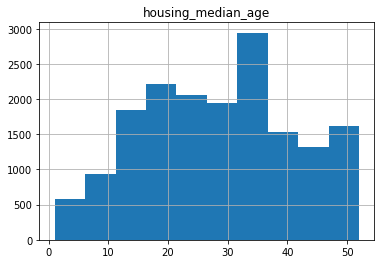

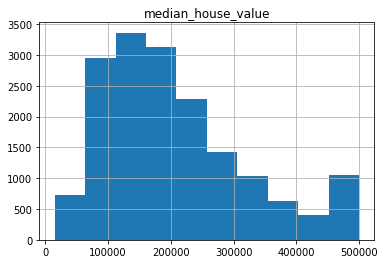

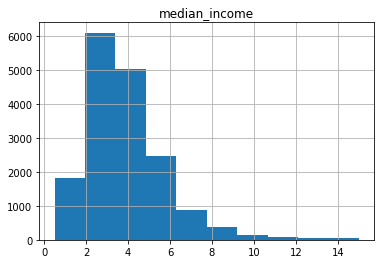

In [7]:
california_housing_dataframe.hist('housing_median_age')
california_housing_dataframe.hist('median_house_value')
california_housing_dataframe.hist('median_income')

In [16]:
city_population = pd.DataFrame({ 'City Name': city_names, 'Population': population})
print(type(city_population['City Name']))
print(city_population['City Name'])
print(city_population[0:2])

<class 'pandas.core.series.Series'>
0    San Francisco
1         San Jose
2       Sacramento
Name: City Name, dtype: object
       City Name  Population
0  San Francisco      852469
1       San Jose     1015785


In [17]:
print(population/1000)

0     852.469
1    1015.785
2     485.199
dtype: float64


In [25]:
city_population['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
city_population['conditional'] = city_names.apply(lambda val: val.startswith('San')) & (city_population['Area square miles']>50)

print(city_population)

       City Name  Population  Area square miles  conditional
0  San Francisco      852469              46.87        False
1       San Jose     1015785             176.53         True
2     Sacramento      485199              97.92        False


In [26]:
print(city_names.index)

RangeIndex(start=0, stop=3, step=1)


In [27]:
print(city_population.index)

RangeIndex(start=0, stop=3, step=1)


In [28]:
city_population.reindex([2,0,1])
print(city_population.index)

RangeIndex(start=0, stop=3, step=1)


In [31]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [32]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
print(california_housing_dataframe)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12995     -121.8      37.3                16.0       2987.0           874.0   
14371     -122.1      37.4                35.0       2016.0           349.0   
4998      -118.1      33.9                35.0       1255.0           252.0   
13485     -122.0      38.3                14.0       3035.0           680.0   
6513      -118.3      33.9                39.0       2078.0           561.0   
...          ...       ...                 ...          ...             ...   
10265     -120.0      38.5                16.0       3045.0           543.0   
16185     -122.5      37.7                44.0       2547.0           511.0   
16257     -122.5      37.9                26.0       2170.0           347.0   
15089     -122.2      37.4                33.0        370.0            42.0   
1378      -117.2      32.7                39.0       3803.0           806.0   

       population  households  median_income  media

In [33]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


To train our model, we'll use the LinearRegressor interface provided by the TensorFlow Estimator API. This API takes care of a lot of the low-level model plumbing, and exposes convenient methods for performing model training, evaluation, and inference.

- Categorical Data: Data that is textual. In this exercise, our housing data set does not contain any categorical features, but examples you might see would be the home style, the words in a real-estate ad.

- Numerical Data: Data that is a number (integer or float) and that you want to treat as a number. As we will discuss more later sometimes you might want to treat numerical data (e.g., a postal code) as if it were categorical.

Next, we'll configure a linear regression model using LinearRegressor. We'll train this model using the GradientDescentOptimizer, which implements Mini-Batch Stochastic Gradient Descent (SGD). The learning_rate argument controls the size of the gradient step.

**NOTE**: To be safe, we also apply gradient clipping to our optimizer via clip_gradients_by_norm. Gradient clipping ensures the magnitude of the gradients do not become too large during training, which can cause gradient descent to fail.

In [68]:
# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["population"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("population")]
# Define the label.
targets = california_housing_dataframe["median_house_value"]

In [69]:
# Use gradient descent as the optimizer for training the model.
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

In [70]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [71]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

In [72]:
# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Mean Squared Error (on training data): 56395.854
Root Mean Squared Error (on training data): 237.478


In [73]:
min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.478


In [74]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.0,119.4
50%,0.1,180.4
75%,0.1,265.0
max,1.8,500.0


In [75]:
sample = california_housing_dataframe.sample(n=300)

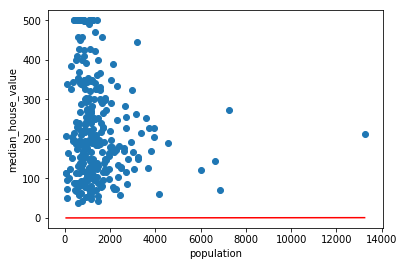

In [76]:
# Get the min and max total_rooms values.
x_0 = sample["population"].min()
x_1 = sample["population"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/population/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("population")

# Plot a scatter plot from our data sample.
plt.scatter(sample["population"], sample["median_house_value"])

# Display graph.
plt.show()

In [87]:
def train_model(learning_rate, steps, batch_size, input_feature="population"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
  return calibration_data

Training model...
RMSE (on training data):
  period 00 : 219.93
  period 01 : 204.04
  period 02 : 190.31
  period 03 : 181.21
  period 04 : 175.66
  period 05 : 169.14
  period 06 : 167.02
  period 07 : 166.31
  period 08 : 168.28
  period 09 : 170.16
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,158.6,207.3
std,130.8,116.0
min,0.1,15.0
25%,87.7,119.4
50%,127.6,180.4
75%,189.1,265.0
max,2276.2,500.0


Final RMSE (on training data): 170.16


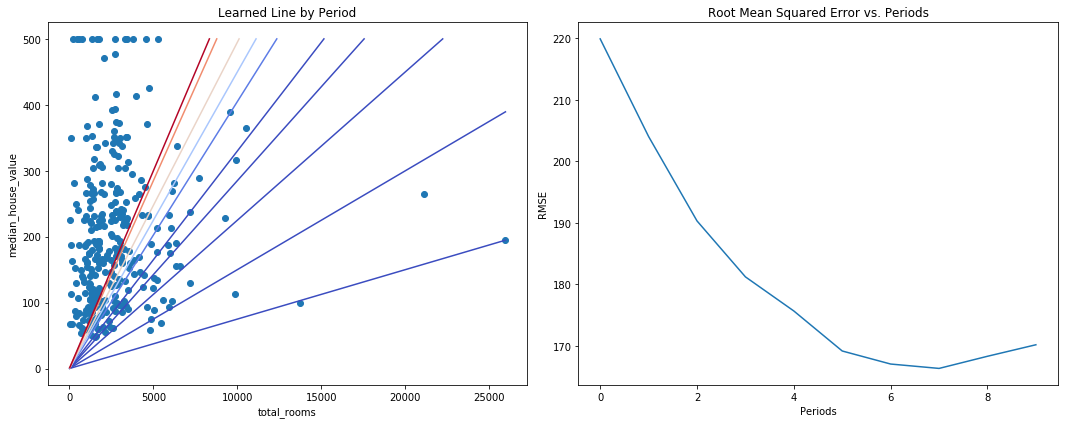

In [67]:
train_model(
    learning_rate=0.00015,
    steps=100,
    batch_size=1
)

Training model...
RMSE (on training data):
  period 00 : 226.78
  period 01 : 216.75
  period 02 : 207.54
  period 03 : 199.28
  period 04 : 192.08
  period 05 : 186.07
  period 06 : 182.19
  period 07 : 179.87
  period 08 : 179.21
  period 09 : 177.59
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,105.5,207.3
std,84.7,116.0
min,0.2,15.0
25%,58.3,119.4
50%,86.1,180.4
75%,127.0,265.0
max,2633.3,500.0


Final RMSE (on training data): 177.59


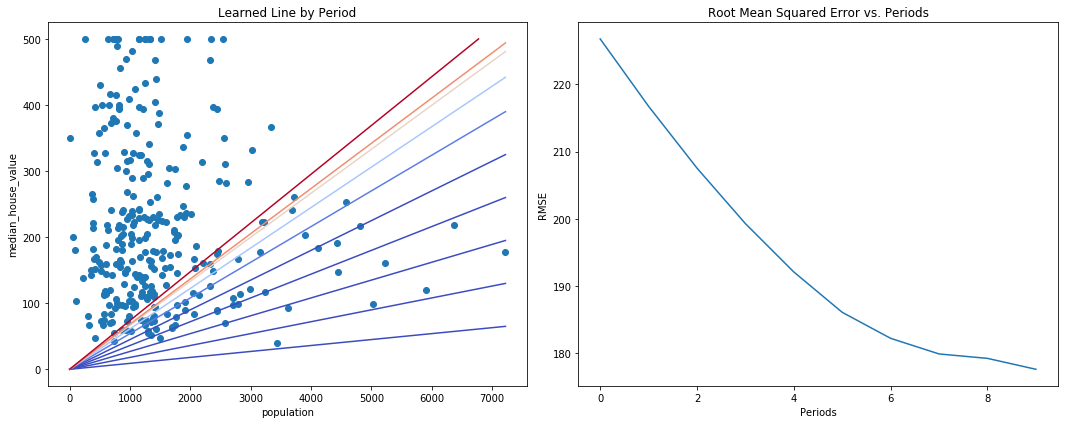

In [80]:
train_model(
    learning_rate=0.00018,
    steps=100,
    batch_size=1
)

Training model...
RMSE (on training data):
  period 00 : 227.62
  period 01 : 217.83
  period 02 : 208.21
  period 03 : 198.97
  period 04 : 191.78
  period 05 : 183.14
  period 06 : 174.93
  period 07 : 168.65
  period 08 : 161.22
  period 09 : 157.07
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,101.0,207.3
std,46.2,116.0
min,23.4,15.0
25%,82.9,119.4
50%,99.4,180.4
75%,113.5,265.0
max,2204.4,500.0


Final RMSE (on training data): 157.07


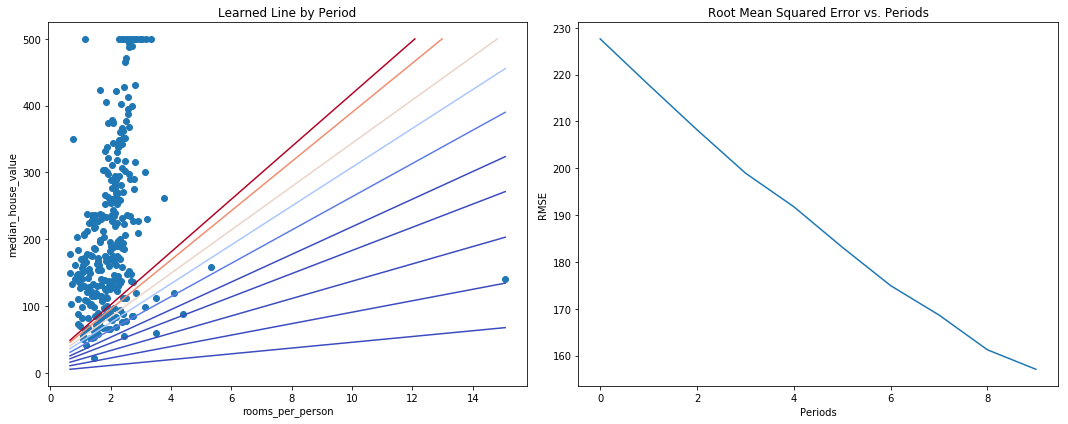

In [88]:
california_housing_dataframe["rooms_per_person"] = california_housing_dataframe["total_rooms"] / california_housing_dataframe["population"]

calibration_data = train_model(
    learning_rate=0.1,
    steps=100,
    batch_size=1,
    input_feature="rooms_per_person"
)

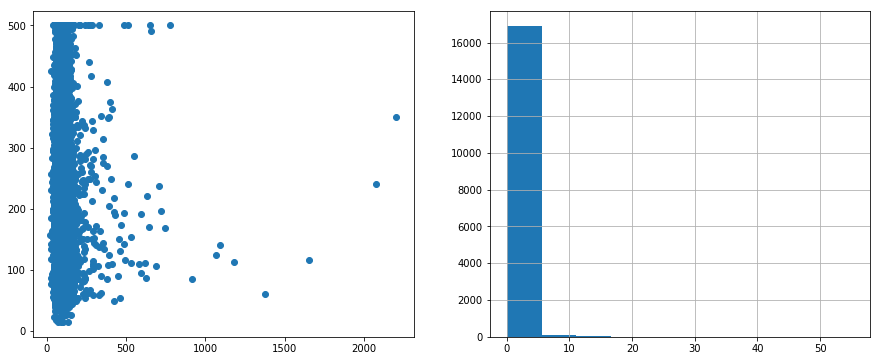

In [91]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(calibration_data["predictions"], calibration_data["targets"])
plt.subplot(1, 2, 2)
_ = california_housing_dataframe["rooms_per_person"].hist()

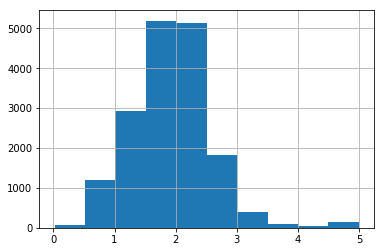

In [92]:
california_housing_dataframe["rooms_per_person"] = (
    california_housing_dataframe["rooms_per_person"]).apply(lambda x: min(x, 5))

_ = california_housing_dataframe["rooms_per_person"].hist()

Training model...
RMSE (on training data):
  period 00 : 227.62
  period 01 : 217.82
  period 02 : 208.23
  period 03 : 198.88
  period 04 : 189.58
  period 05 : 180.52
  period 06 : 171.80
  period 07 : 164.71
  period 08 : 160.28
  period 09 : 152.15
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,100.9,207.3
std,26.3,116.0
min,23.9,15.0
25%,84.1,119.4
50%,100.9,180.4
75%,115.2,265.0
max,223.5,500.0


Final RMSE (on training data): 152.15


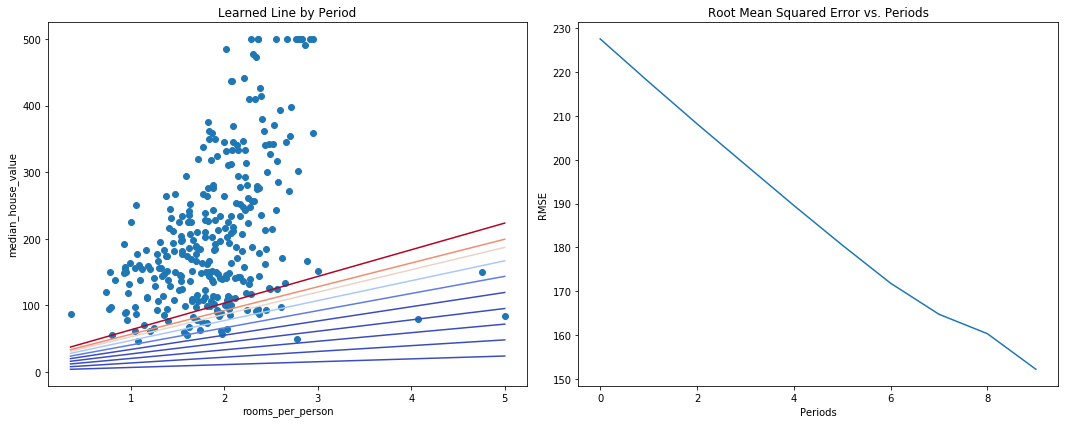

In [93]:
calibration_data = train_model(
    learning_rate=0.1,
    steps=100,
    batch_size=1,
    input_feature="rooms_per_person"
)

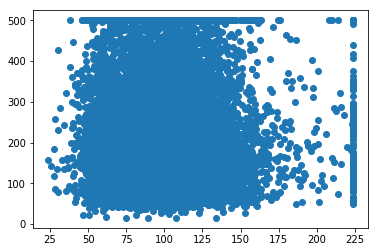

In [94]:
_ = plt.scatter(calibration_data["predictions"], calibration_data["targets"])